<a href="https://colab.research.google.com/github/twishackaul/Cat-vs-Dog/blob/main/Dog_vs_Cat_Object_Detection_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# downloading dataset using API

!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:26<00:00, 37.7MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = 'inferred',
    label_mode = 'int',             # cat ---> 0 and dog ---> 1
    image_size = (256, 256),
    batch_size = 32
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = 'inferred',
    label_mode = 'int',             # cat ---> 0 and dog ---> 1
    image_size = (256, 256),
    batch_size = 32
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalizing our data

def normalize(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [8]:
model1 = keras.Sequential([

    keras.layers.Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    keras.layers.Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    keras.layers.Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = model1.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 89ms/step - loss: 0.6243 - accuracy: 0.6339 - val_loss: 0.5258 - val_accuracy: 0.7378
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5064 - accuracy: 0.7485 - val_loss: 0.5076 - val_accuracy: 0.7428
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4116 - accuracy: 0.8078 - val_loss: 0.4642 - val_accuracy: 0.7878
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.3010 - accuracy: 0.8672 - val_loss: 0.4937 - val_accuracy: 0.8066
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.2011 - accuracy: 0.9182 - val_loss: 0.6450 - val_accuracy: 0.8008
Epoch 6/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1306 - accuracy: 0.9507 - val_loss: 0.7746 - val_accuracy: 0.7890
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0906 - accuracy: 0.9679 - val_loss: 0.8305 - val_accuracy:

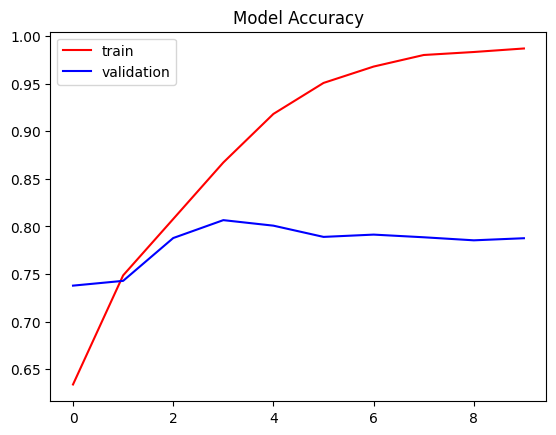

In [14]:
plt.plot(history.history['accuracy'], color = 'red', label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()

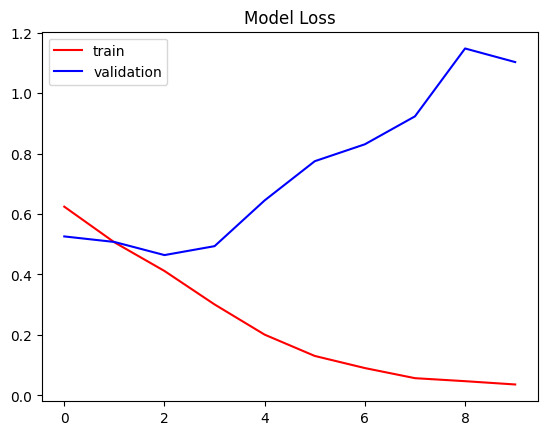

In [15]:
plt.plot(history.history['loss'], color = 'red', label ='train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.title('Model Loss')
plt.legend()
plt.show()

In [16]:
model2 = keras.Sequential([

    keras.layers.Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    keras.layers.Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    keras.layers.Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [17]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
history2 = model2.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 113ms/step - loss: 1.3220 - accuracy: 0.5903 - val_loss: 0.6328 - val_accuracy: 0.6202
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5655 - accuracy: 0.7133 - val_loss: 0.5002 - val_accuracy: 0.7558
Epoch 3/10
625/625 [==============================] - 86s 137ms/step - loss: 0.4700 - accuracy: 0.7775 - val_loss: 0.4934 - val_accuracy: 0.7602
Epoch 4/10
625/625 [==============================] - 73s 117ms/step - loss: 0.4157 - accuracy: 0.8100 - val_loss: 0.4986 - val_accuracy: 0.7618
Epoch 5/10
625/625 [==============================] - 79s 125ms/step - loss: 0.3563 - accuracy: 0.8400 - val_loss: 0.6332 - val_accuracy: 0.7034
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2935 - accuracy: 0.8752 - val_loss: 0.4108 - val_accuracy: 0.8088
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2260 - accuracy: 0.9071 - val_loss: 0.6928 - val_ac

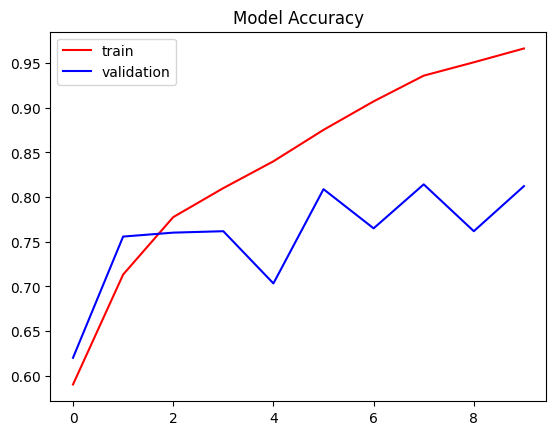

In [19]:
plt.plot(history2.history['accuracy'], color = 'red', label = 'train')
plt. plot(history2.history['val_accuracy'], color = 'blue', label = 'validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()

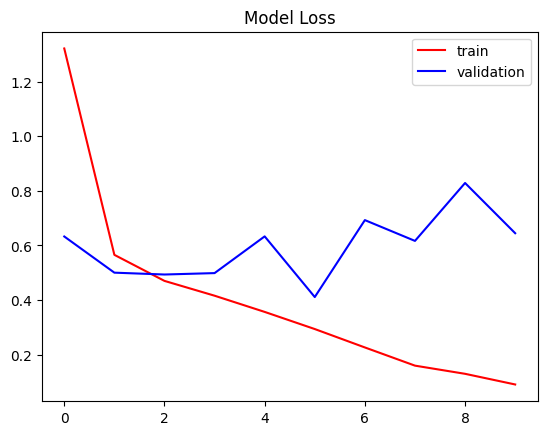

In [20]:
plt.plot(history2.history['loss'], color = 'red', label = 'train')
plt. plot(history2.history['val_loss'], color = 'blue', label = 'validation')
plt.title('Model Loss')
plt.legend()
plt.show()

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

## Comparing both the models

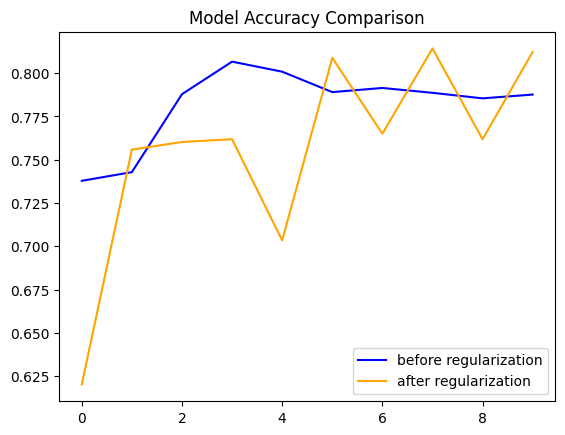

In [21]:
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'before regularization')
plt.plot(history2.history['val_accuracy'], color = 'orange', label = 'after regularization')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

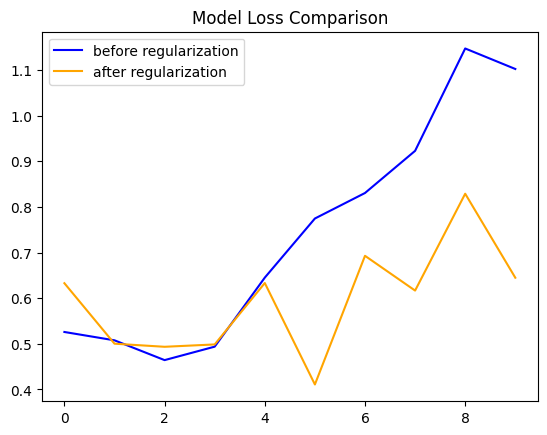

In [22]:
plt.plot(history.history['val_loss'], color = 'blue', label = 'before regularization')
plt.plot(history2.history['val_loss'], color = 'orange', label = 'after regularization')
plt.title('Model Loss Comparison')
plt.legend()
plt.show()

In [24]:
import cv2

In [57]:
test_img = cv2.imread('/content/testdog.jpg')

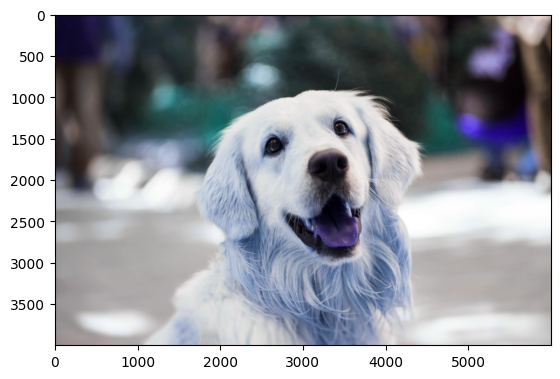

In [58]:
plt.imshow(test_img)
plt.show()

In [59]:
test_img.shape

(4000, 6000, 3)

In [60]:
test_img = cv2.resize(test_img, (256, 256))

In [61]:
test_img.shape

(256, 256, 3)

In [62]:
test_img = test_img.reshape(1, 256, 256, 3)
test_img.shape

(1, 256, 256, 3)

In [63]:
result = model2.predict(test_img)

1/1 [==============================] - 0s 21ms/step


In [64]:
int(result)

1

####Label 1 -----> DOG

In [65]:
test_img2 = cv2.imread('/content/cat.jpeg')

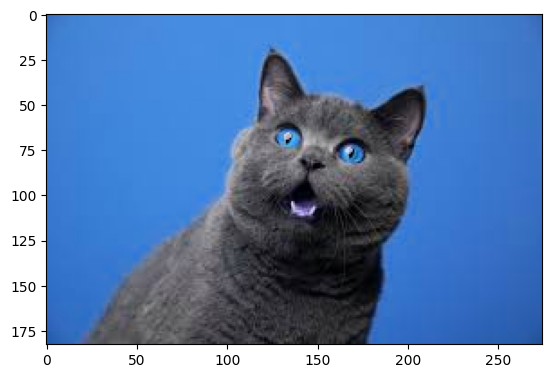

In [66]:
plt.imshow(test_img2)
plt.show()

In [67]:
test_img2.shape

(183, 275, 3)

In [68]:
test_img2 = cv2.resize(test_img2, (256, 256))
test_img2 = test_img2.reshape(1, 256, 256, 3)
test_img2.shape

(1, 256, 256, 3)

In [69]:
result2 = model2.predict(test_img2)

1/1 [==============================] - 0s 19ms/step


In [70]:
int(result2)

0

####Label 0 ----> CAT